# Mall Customer Segmentation Data
**About Dataset**
**Context**
This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis . I will demonstrate this by using unsupervised ML technique (KMeans Clustering Algorithm) in the simplest form.

**Content**
You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

**Problem Statement**
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

# Data Analysis

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
df=pd.read_csv(r'C:\Users\islam\OneDrive\Desktop\Work File\Machine Learning\Unsupervised ML_Clustering\Customer Segmentation\Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


# Data vaisulaization

<Axes: >

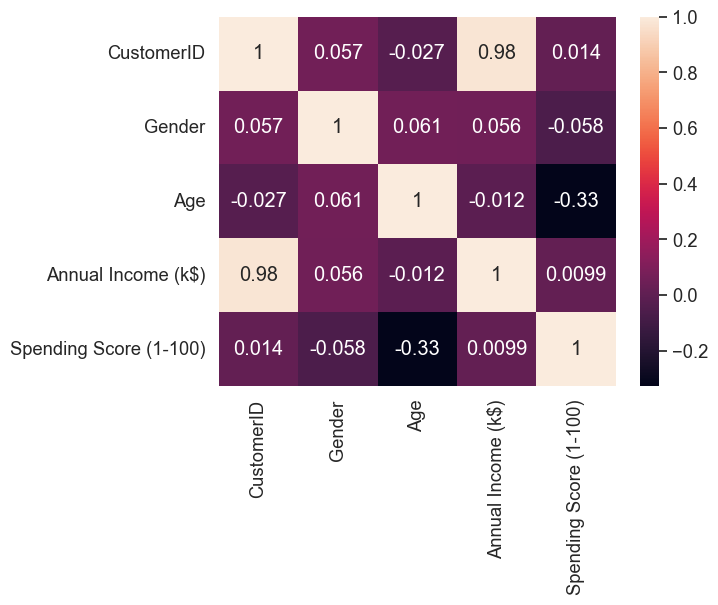

In [6]:
#Data Correlations
df.replace({'Gender':{'Male':1,'Female':0}},inplace=True)
fig = plt.figure(dpi = 100)
sns.set(rc={'figure.figsize':[25,10]},font_scale=1.2)
sns.heatmap(df.corr(), annot = True)

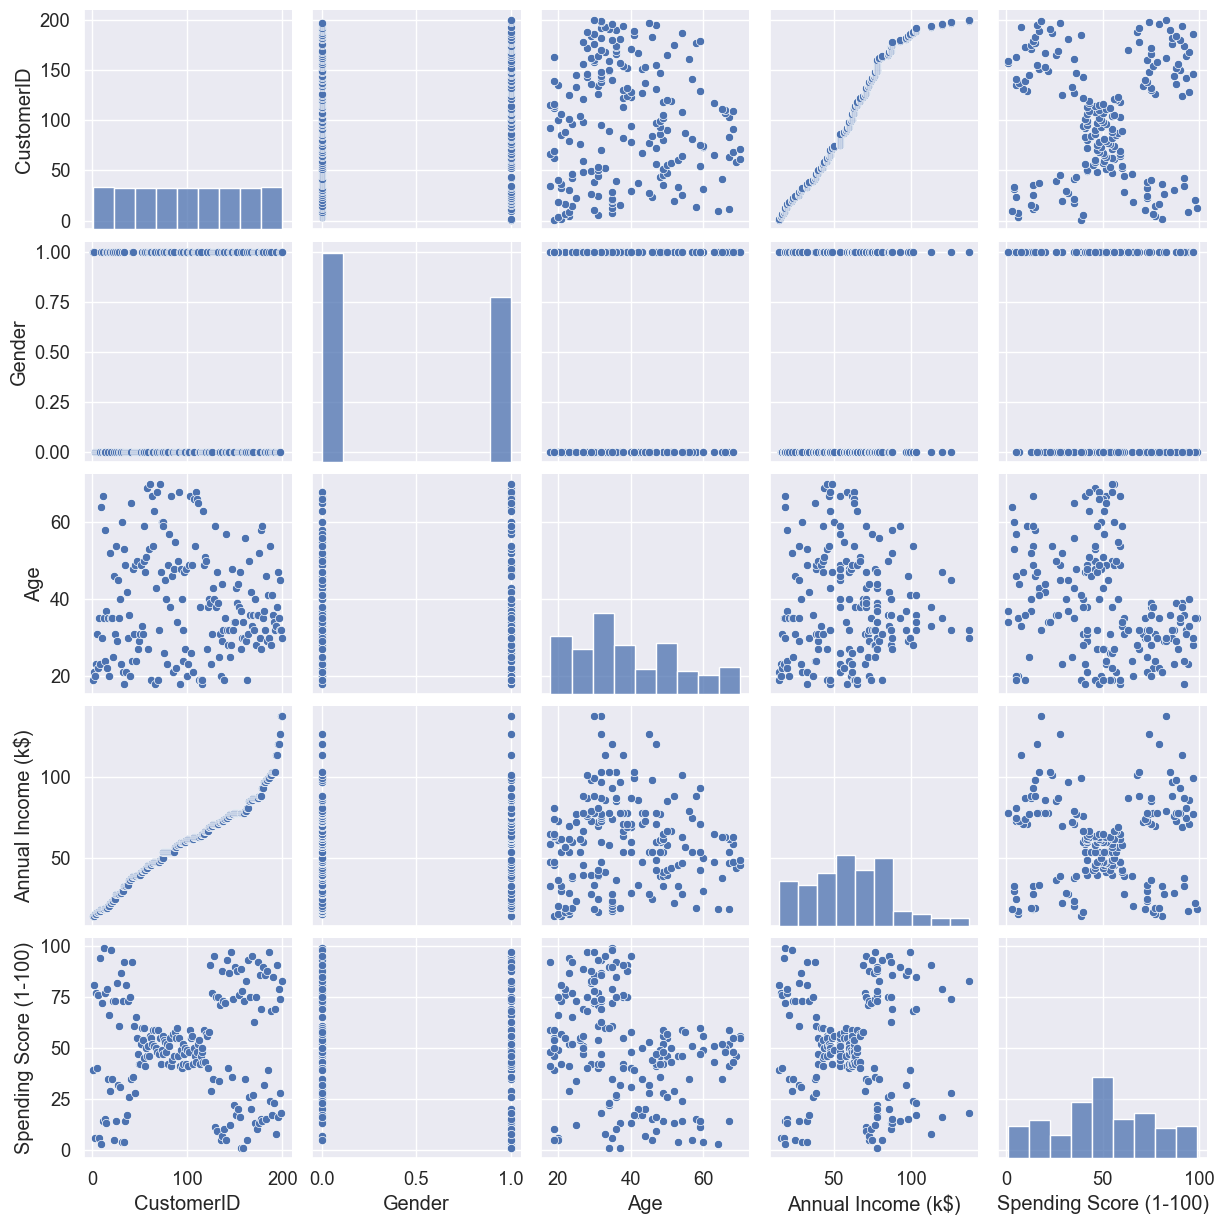

In [7]:
sns.pairplot(df)

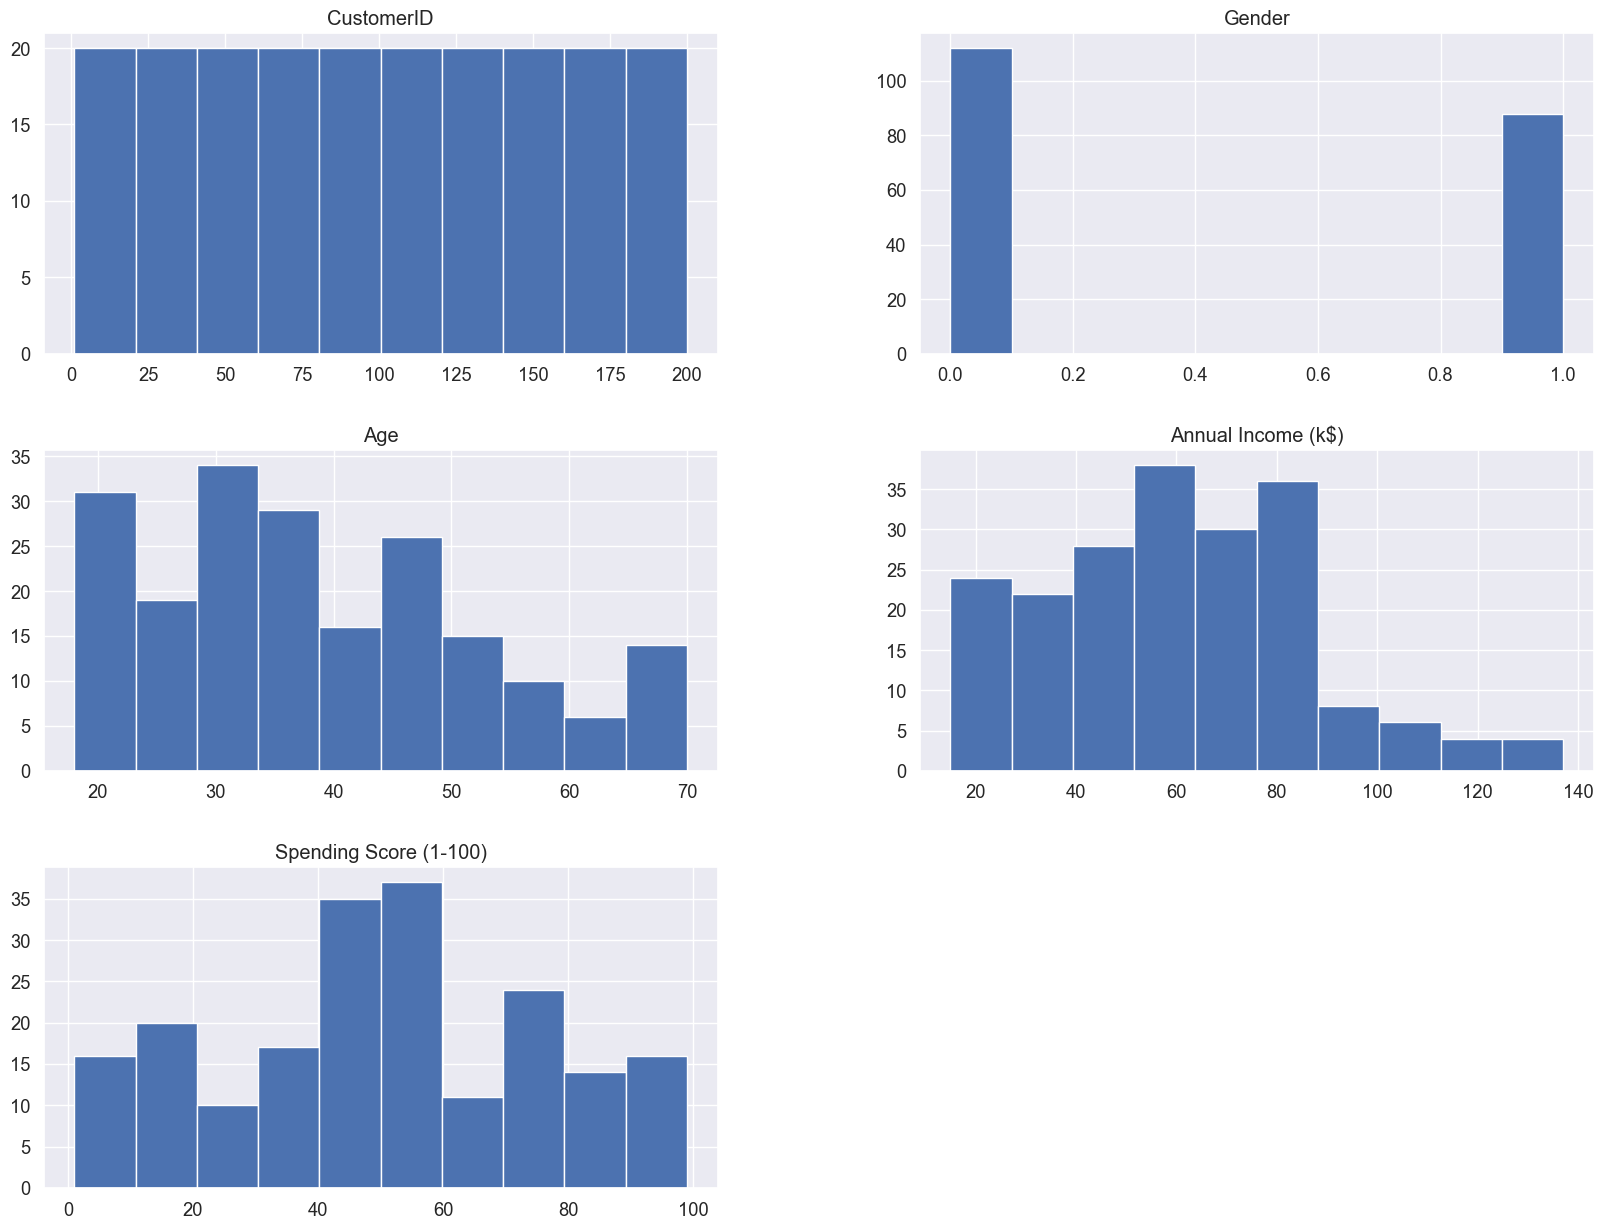

In [8]:
df.hist(figsize=(20,15))
plt.show()

<Axes: ylabel='count'>

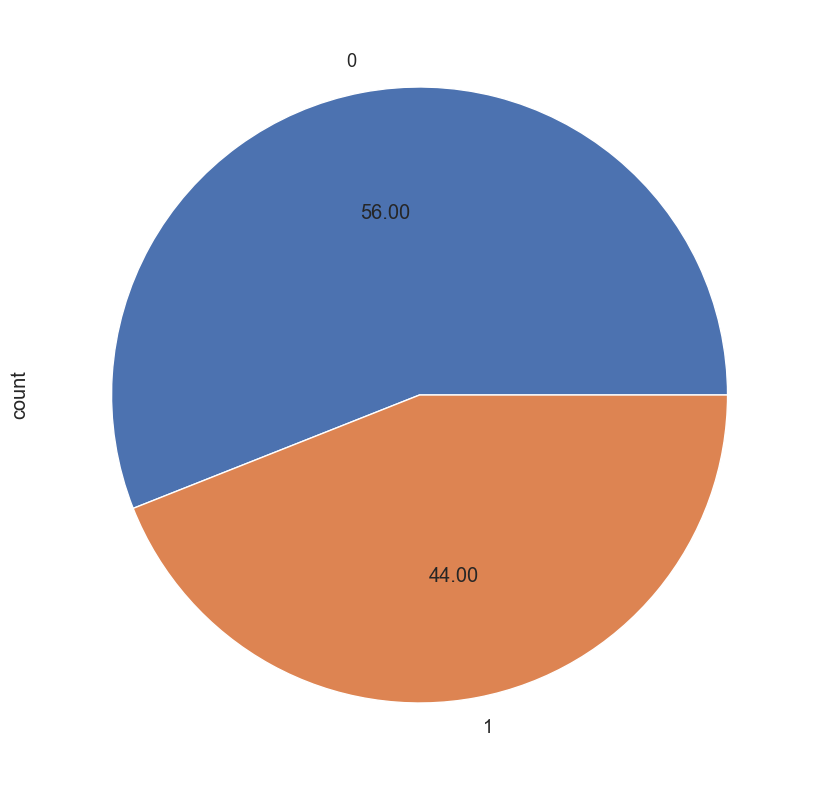

In [9]:
df.Gender.value_counts().plot.pie(autopct='%0.2f')

<Axes: xlabel='Gender', ylabel='Annual Income (k$)'>

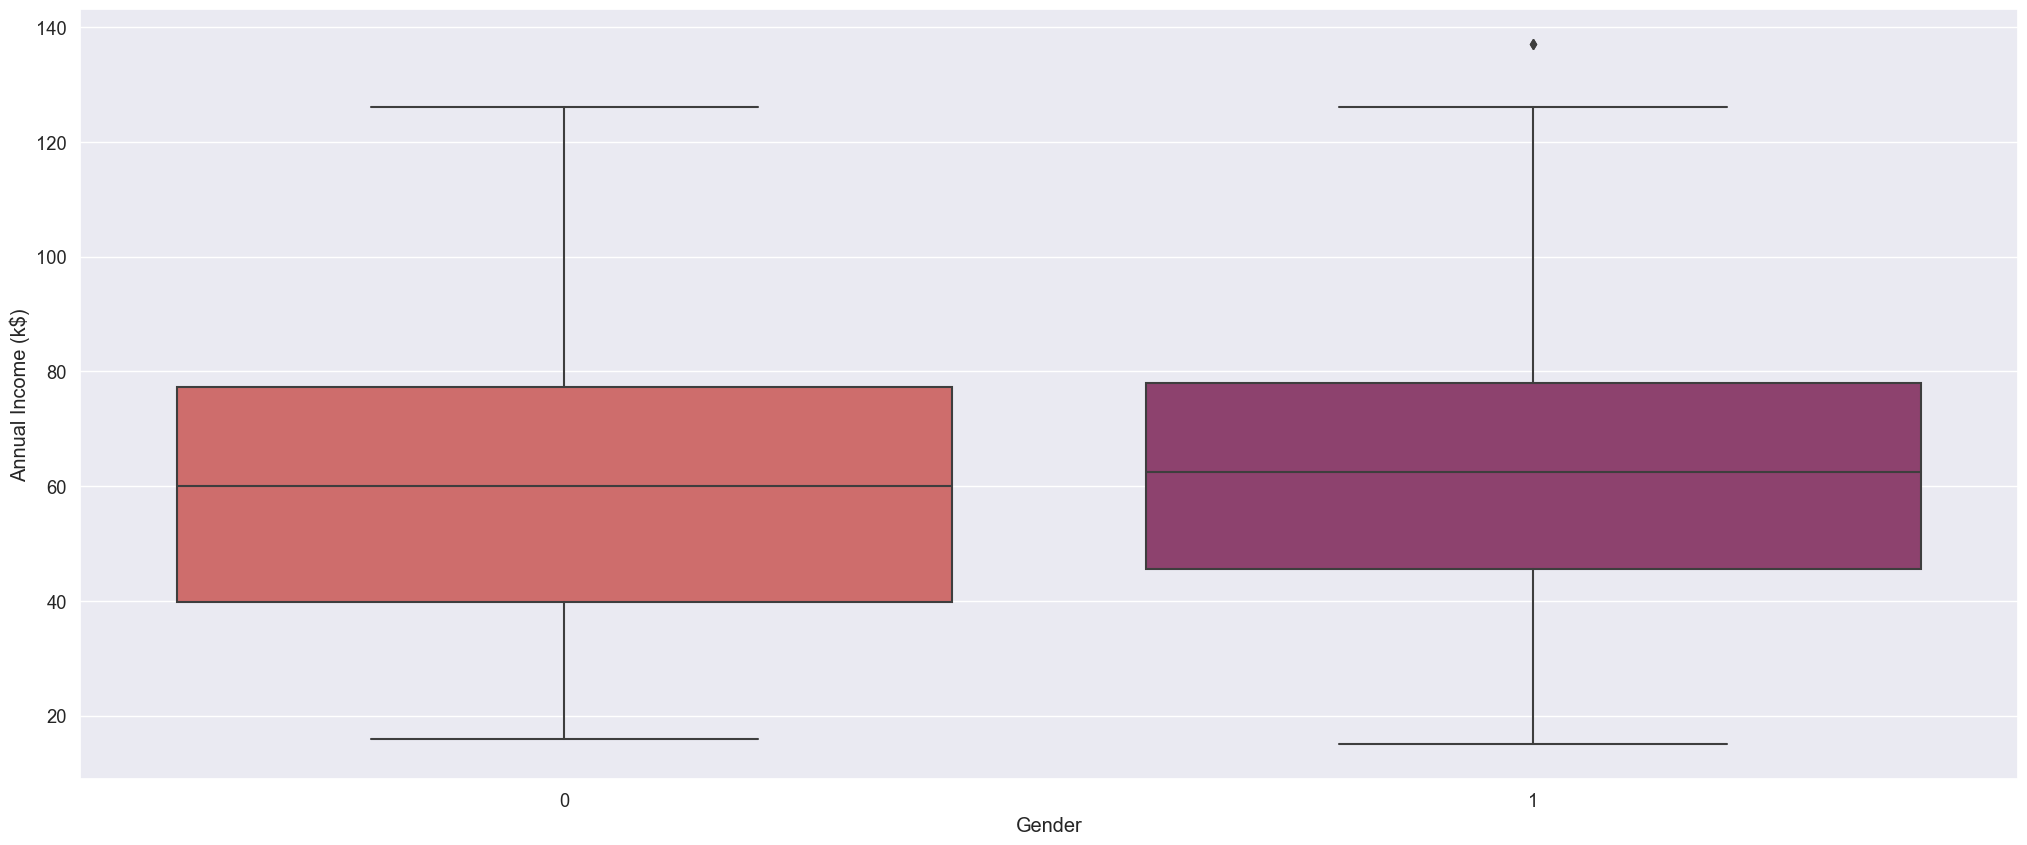

In [10]:
#Catgirical Feature-Bivariate
sns.boxplot(x='Gender',y='Annual Income (k$)',data=df,palette='flare')

In [11]:
la=LabelEncoder()

In [12]:
df.Gender=la.fit_transform(df.Gender)
df


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


# Creat The Model 

In [13]:
clustersn=[]
j=[]

In [14]:
for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit(df)
    clustersn.append(i)
    j.append(model.inertia_)

In [15]:
clusters=pd.DataFrame({'clusters_K':clustersn,'Error ratio':j})
clusters.style.background_gradient()

,clusters_K,Error ratio
0,1,975512.060000
1,2,387065.713771
2,3,271594.461295
3,4,195401.198560
4,5,186803.081233
5,6,122637.557961
6,7,103295.048936
7,8,86295.316410
8,9,83311.400225
9,10,83021.390154


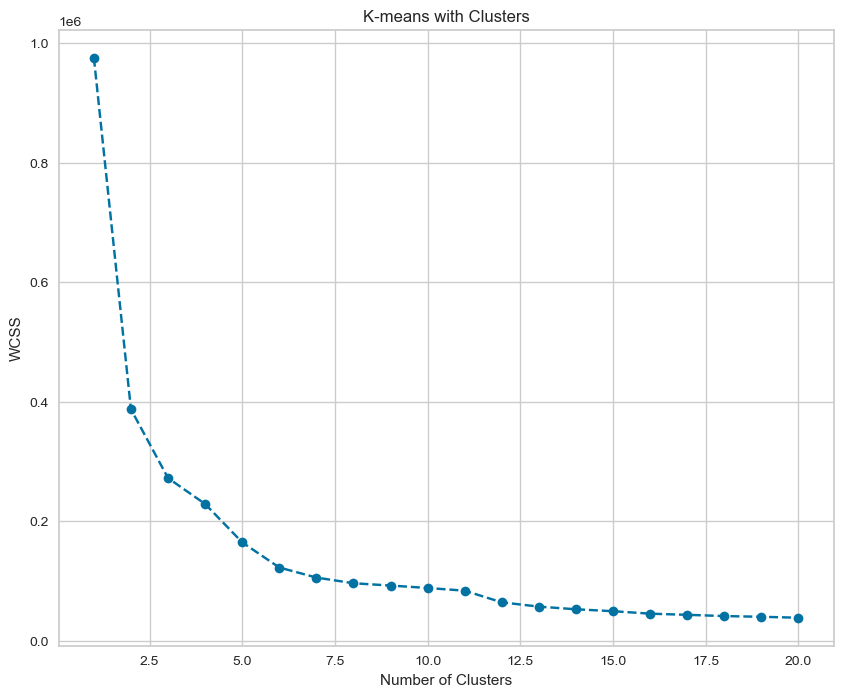

In [42]:
#Elbow Graph
wcss = []
for i in range(1,21):
    kmeans = KMeans(n_clusters=i,init="k-means++",random_state=0)
    model = kmeans.fit(df)
    wcss.append(model.inertia_)
    
plt.figure(figsize=(10,8))
plt.plot(range(1,21),wcss,marker="o",linestyle="--")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("K-means with Clusters")
plt.show()    # it looks like 6


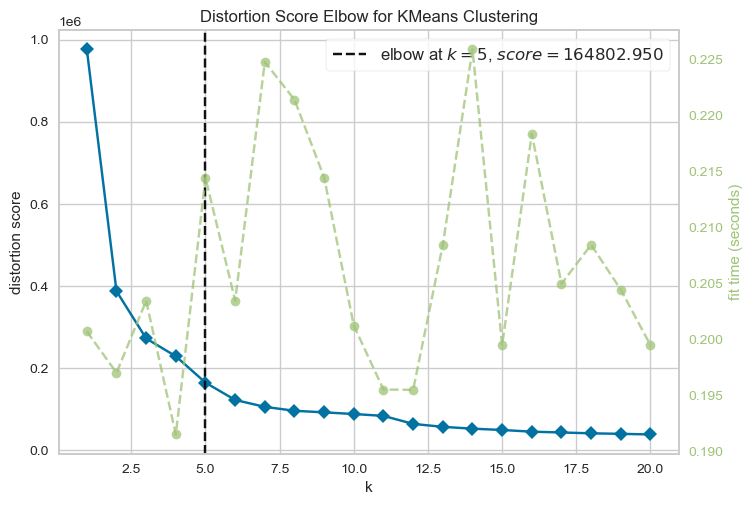

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [51]:
from yellowbrick.cluster import KElbowVisualizer
kmodel = KMeans(random_state=0,init="k-means++")
grafik = KElbowVisualizer(kmodel,k=(1,21))
grafik.fit(df)
grafik.poof()


In [62]:
from sklearn.cluster import KMeans
k_means=KMeans()
k_means.fit(df)
k_means=KMeans(n_clusters=5,random_state=42)
prediction=model.predict(df)

In [34]:
df['Output']=prediction
df


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Output
0,1,1,19,15,39,4
1,2,1,21,15,81,4
2,3,0,20,16,6,1
3,4,0,23,16,77,4
4,5,0,31,17,40,1
...,...,...,...,...,...,...
195,196,0,35,120,79,3
196,197,0,45,126,28,2
197,198,1,32,126,74,3
198,199,1,32,137,18,2


In [46]:
df1=df[df['Output']==0]
df2=df[df['Output']==1]
df3=df[df['Output']==2]
df4=df[df['Output']==3]
df5=df[df['Output']==4]

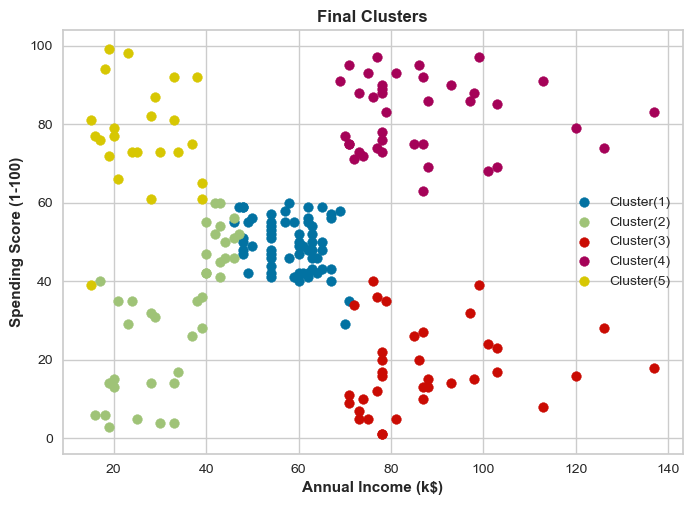

In [65]:
#plt.figure(facecolor='black')
#ax = plt.axes()
#ax.set_facecolor("white")
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],label='Cluster(1)')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],label='Cluster(2)')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],label='Cluster(3)')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],label='Cluster(4)')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],label='Cluster(5)')

plt.title('Final Clusters',fontweight='bold')
plt.xlabel('Annual Income (k$)',fontweight='bold')
plt.ylabel('Spending Score (1-100)',fontweight='bold')
plt.legend()

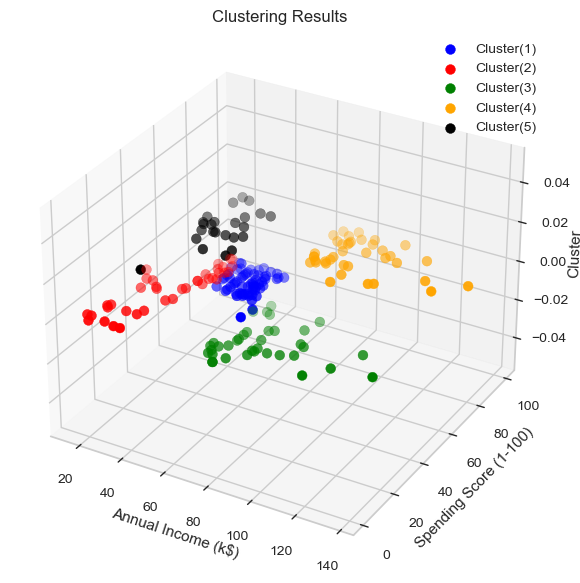

In [50]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
ax.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'], zs=0, zdir='z', s=50, c='blue', marker='o', label='Cluster(1)')
ax.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'], zs=0, zdir='z', s=50, c='red', marker='o', label='Cluster(2)')
ax.scatter(df3['Annual Income (k$)'], df3['Spending Score (1-100)'], zs=0, zdir='z', s=50, c='green', marker='o', label='Cluster(3)')
ax.scatter(df4['Annual Income (k$)'], df4['Spending Score (1-100)'], zs=0, zdir='z', s=50, c='orange', marker='o',label='Cluster(4)')
ax.scatter(df5['Annual Income (k$)'], df5['Spending Score (1-100)'], zs=0, zdir='z', s=50, c='black', marker='o',label='Cluster(5)')

# Set labels and title
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Cluster')
ax.set_title('Clustering Results')

# Show legend
ax.legend()

# Show plot
plt.show()


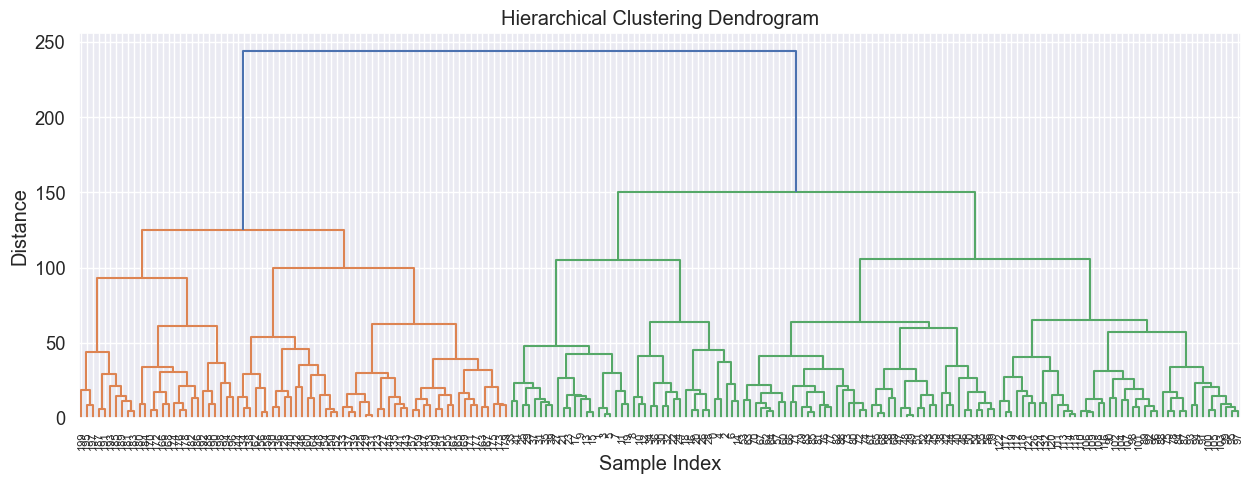

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage


# حساب المسافات بين النقاط باستخدام الربط الوصلي (complete linkage)
Z = linkage(df, 'complete')

# رسم النموذج الهرمي
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # تدوير الأوراق
    leaf_font_size=8.,  # حجم الخط
)
plt.show()